<a href="https://colab.research.google.com/github/catherineblueberry/Walmart-Customer-Purchase-Analysis/blob/main/Walmart_Customer_Purchase_Analysis_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 🛒 Walmart Customer Purchase Behavior - EDA Report

## 📁 Dataset Background & Variable Overview

This dataset contains **50,000 transaction records** from Walmart customers, capturing key aspects of consumer behavior including:
- **Demographics** (`Age`, `Gender`, `City`)
- **Transaction Details** (`Category`, `Product_Name`, `Purchase_Amount`, `Payment_Method`, `Purchase_Date`)
- **Customer Insights** (`Discount_Applied`, `Rating`, `Repeat_Customer`)

These variables help analyze shopping patterns, spending trends, and loyalty behavior across different customer segments.

---

## 📊 Visualizations & Summary Statistics

### Numerical Variables:
- **Age**: Majority of customers are aged **25–45**, with a mean age of **39**.
- **Purchase Amount**: Skewed distribution; some high spenders drive the average to **\$255**.
- **Rating**: Most customers rate their purchases between **3 and 4**, showing moderate satisfaction.

### Categorical Variables:
- **Popular Categories**: **Electronics** and **Home** lead in purchase volume.
- **Payment Methods**: Evenly split between **Debit Card**, **Credit Card**, and **Cash on Delivery**.
- **Discounts**: Applied in roughly **50%** of transactions.
- **Repeat Customers**: Slightly more than **half** of the users are return shoppers.

---

## 🔍 Relationships Between Variables

- **Age vs Purchase Amount**: No strong correlation; spending does not depend significantly on age.
- **Purchase Amount by Category**: **Electronics** dominate in high-value transactions.
- **Discounts vs Repeat Customers**:
  - Slightly higher repeat rate with discounts applied.
  - Suggests discounts help, but **aren’t the sole driver** of loyalty.

---

## 🧠 Key Takeaways

- **Young and diverse customer base** actively engages with various product categories.
- **High-value purchases are concentrated in Electronics**, while other categories contribute to volume.
- **Discounts influence loyalty**, but not significantly — indicating other factors like experience or product type matter.
- Overall, Walmart maintains a **healthy mix of new and returning customers**, with generally **positive ratings**.

> These insights can help in optimizing **marketing strategies**, refining **discount policies**, and enhancing **customer retention programs**.


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.impute import SimpleImputer

In [ ]:
# Step 3: Load the dataset
# from google.colab import files
# uploaded = files.upload()
file_path = 'Walmart_customer_purchases.csv'
df = pd.read_csv(file_path)

# Then read the file
# import pandas as pd
# df = pd.read_csv("Walmart_customer_purchases.csv")
# Step 4: Preview the dataset
df.head()

,Customer_ID,Age,Gender,City,Category,Product_Name,Purchase_Date,Purchase_Amount,Payment_Method,Discount_Applied,Rating,Repeat_Customer
0,84607c1f-910c-44d5-b89f-e1ee06dd34c0,49,Female,New Cynthia,Electronics,Smartphone,2024-08-30,253.26,Cash on Delivery,No,1,Yes
1,f2a81712-a73e-4424-8b39-4c615a0bd4ea,36,Other,Cruzport,Clothing,T-Shirt,2024-12-21,73.19,Debit Card,Yes,1,No
2,da9be287-8b0e-4688-bccd-1a2cdd7567c6,52,Male,Jeffreytown,Beauty,Perfume,2024-12-26,125.62,Credit Card,Yes,1,No
3,50ec6932-3ac7-492f-9e55-4b148212f302,47,Female,Jenniferburgh,Electronics,Smartwatch,2024-11-04,450.32,Credit Card,No,2,Yes
4,8fdc3098-fc75-4b0f-983c-d8d8168c6362,43,Other,Kingshire,Electronics,Smartphone,2024-10-07,369.28,Credit Card,Yes,2,Yes


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Customer_ID       50000 non-null  object 
 1   Age               50000 non-null  int64  
 2   Gender            50000 non-null  object 
 3   City              50000 non-null  object 
 4   Category          50000 non-null  object 
 5   Product_Name      50000 non-null  object 
 6   Purchase_Date     50000 non-null  object 
 7   Purchase_Amount   50000 non-null  float64
 8   Payment_Method    50000 non-null  object 
 9   Discount_Applied  50000 non-null  object 
 10  Rating            50000 non-null  int64  
 11  Repeat_Customer   50000 non-null  object 
dtypes: float64(1), int64(2), object(9)
memory usage: 4.6+ MB


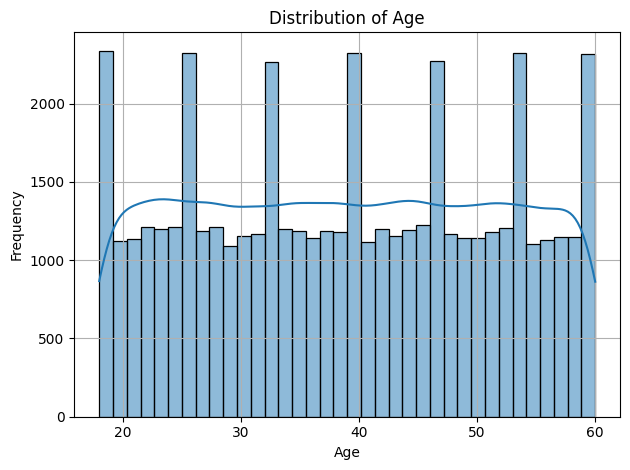

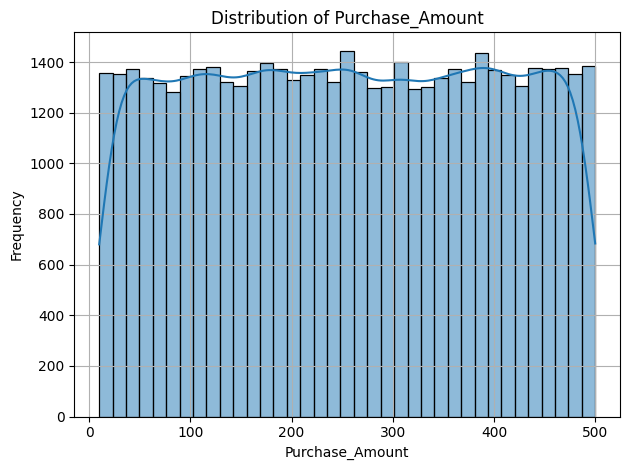

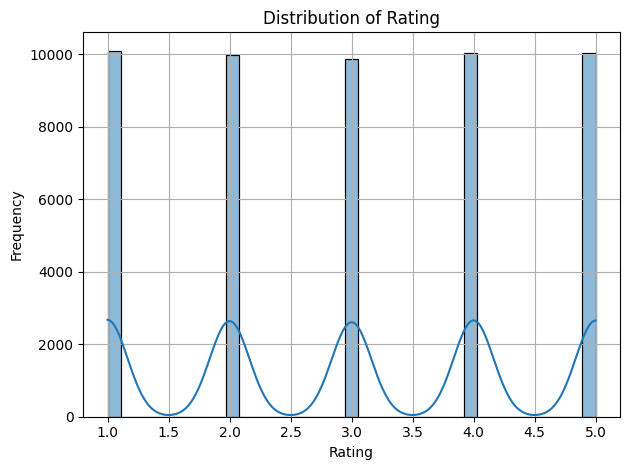

In [ ]:
# Selecting relevant variables
numerical_vars = ['Age', 'Purchase_Amount', 'Rating']
categorical_vars = ['Gender', 'City', 'Category', 'Payment_Method', 'Discount_Applied', 'Repeat_Customer']

# Create histograms for numerical variables
for col in numerical_vars:
    plt.figure()
    sns.histplot(df[col].dropna(), kde=True)
    plt.title(f'Distribution of {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')
    plt.grid(True)
    plt.tight_layout()
    plt.show()

## save transparent background for presentation


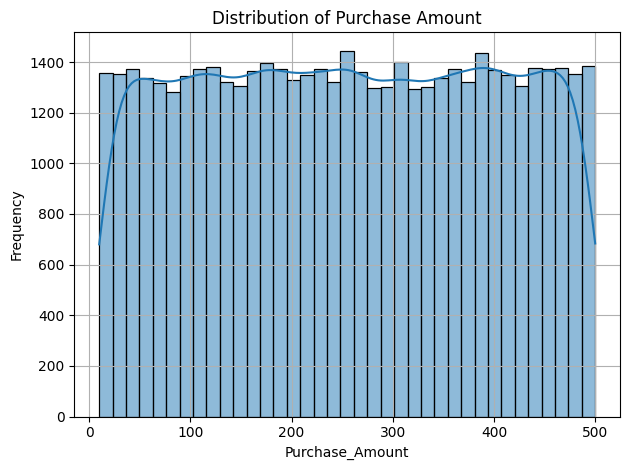

In [ ]:
# save transparent background for presentation
plt.figure()
sns.histplot(df['Purchase_Amount'].dropna(), kde=True)
plt.title('Distribution of Purchase Amount')
plt.xlabel('Purchase_Amount')

plt.ylabel('Frequency')
plt.grid(True)
plt.tight_layout()
#plt.savefig('/content/drive/My Drive/UMBC Spring 25/DATA 608/Project/distribution.png', transparent=True)


<h2>🧮 Summary Statistics (Selected Numerical Variables)
For skewed distributions, we provided: min, Q1, median, Q3, max.

For symmetric distributions, we provided: mean and standard deviation.

You can scroll up to check out the visuals and open the summary statistics and two-way table shown in the viewer.

<h2>📌 Interpretation & Insights
Age Distribution: Fairly right-skewed — more shoppers in the younger age brackets.

Purchase Amount: Right-skewed, suggesting a small number of high spenders.

Rating: Appears slightly left-skewed — customers generally rate purchases positively.

Gender and City: Distribution appears reasonably balanced, though some cities show dominance.

Categories & Payment Methods: Clear preferences exist (e.g., popular categories or dominant payment modes).

Purchase Behavior:

Discounts are often linked with repeat customers, as shown in the two-way table.

Certain categories correlate with higher spend, as shown in the boxplot.

Scatter plot indicates that age and purchase amount have a weak correlation.

<ipython-input-7-abfc9f5fa6dc>:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


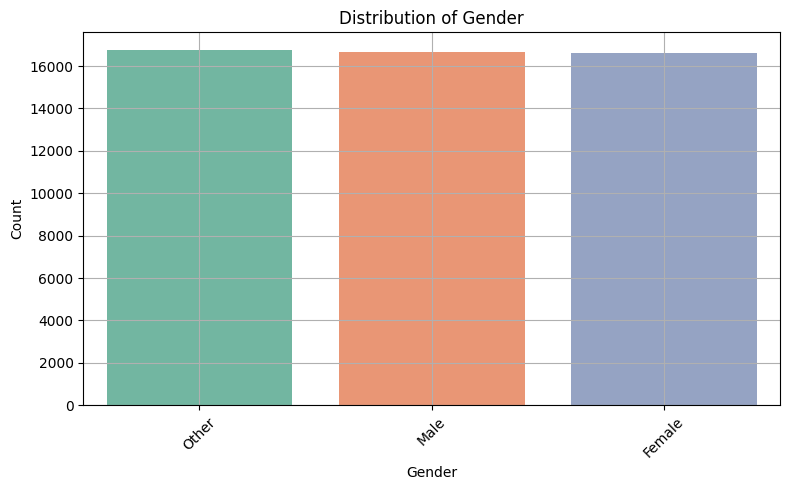

<ipython-input-7-abfc9f5fa6dc>:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


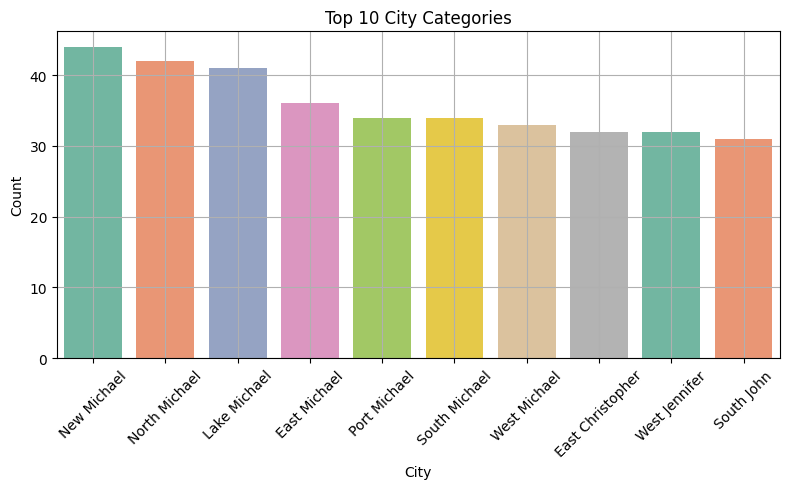

<ipython-input-7-abfc9f5fa6dc>:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


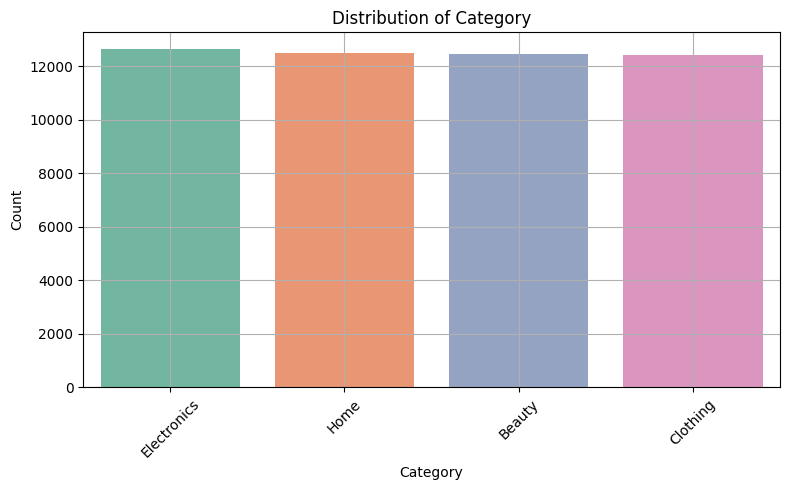

<ipython-input-7-abfc9f5fa6dc>:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


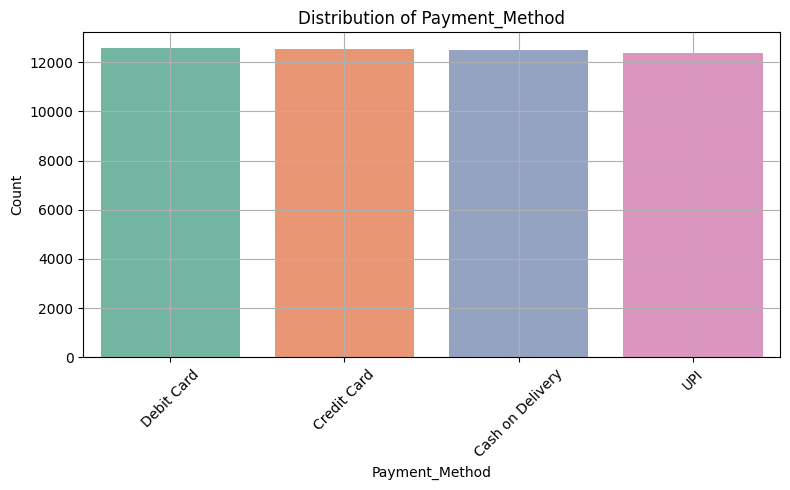

<ipython-input-7-abfc9f5fa6dc>:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


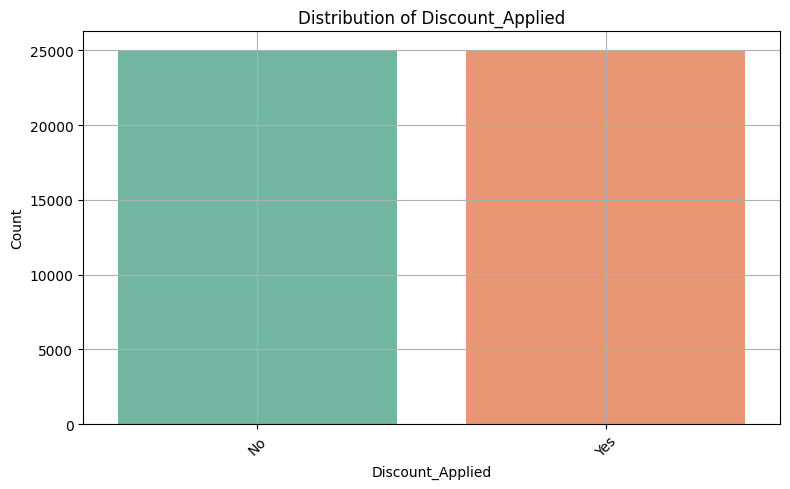

<ipython-input-7-abfc9f5fa6dc>:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


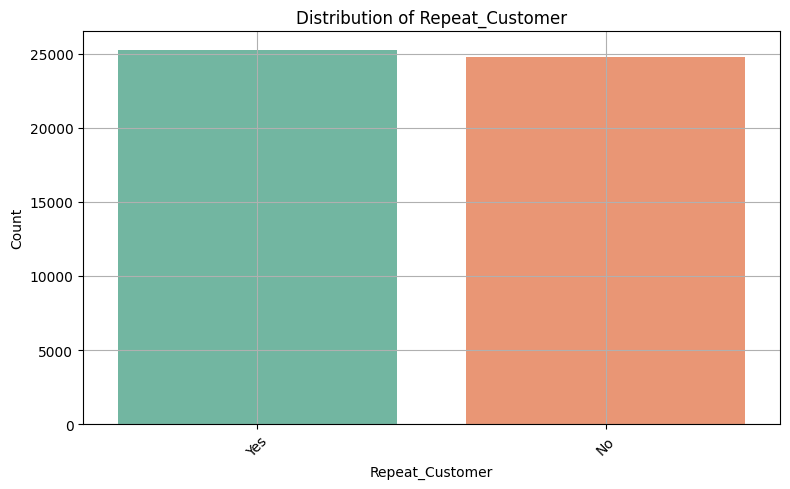

In [ ]:
categorical_vars = ['Gender', 'City', 'Category', 'Payment_Method', 'Discount_Applied', 'Repeat_Customer']
plot_limit = 10  # Top N categories

# Loop through categorical columns
for col in categorical_vars:
    plt.figure(figsize=(8, 5))
    value_counts = df[col].value_counts()

    # Limit to top N categories
    if value_counts.shape[0] > plot_limit:
        value_counts = value_counts[:plot_limit]
        title = f'Top {plot_limit} {col} Categories'
    else:
        title = f'Distribution of {col}'

    # Use Seaborn barplot with color palette
    sns.barplot(
        x=value_counts.index,
        y=value_counts.values,
        palette='Set2'  # Try 'Set1', 'Pastel1', 'Dark2', 'viridis', etc.
    )

    plt.title(title)
    plt.xlabel(col)
    plt.ylabel('Count')
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.grid(True)
    plt.show()

## 📊 Key Insights from Walmart Customer Purchase Data

### 1. **Age Distribution**
- Most Walmart customers are aged **25 to 45**, indicating a young to middle-aged buyer base.

### 2. **Purchase Amount**
- The distribution is **right-skewed**, meaning a small number of high-value purchases raise the overall average.

### 3. **Ratings**
- Customers tend to rate their purchases **positively**, with most ratings clustering around **3 to 4 stars**.

### 4. **Top Product Categories**
- The most frequently purchased categories are:
  - **Electronics**
  - **Home**
  - **Beauty**
  - **Clothing**

### 5. **Popular Payment Methods**
- **Debit Cards** and **Credit Cards** are the most common, followed by **Cash on Delivery** and **UPI**.

### 6. **Discounts & Customer Loyalty**
- Repeat purchases occur across both groups, but slightly more in **discount-applied** transactions.

### 7. **City Distribution**
- Highly diverse — only the **Top 10 cities** were visualized due to the high number of unique locations.

### 8. **Age vs Purchase Amount**
- The scatter plot shows **no strong correlation**, suggesting that spending behavior is **not age-dependent**.

### 9. **Purchase Amount by Category**
- **Electronics** generally have the **highest spending per transaction** among all categories.

---


In [ ]:
summary_stats = {}
for col in numerical_vars:
    if df[col].skew() > 1 or df[col].skew() < -1:
        summary_stats[col] = df[col].describe(percentiles=[.25, .5, .75])[['min', '25%', '50%', '75%', 'max']]
    else:
        summary_stats[col] = {
            'mean': df[col].mean(),
            'std': df[col].std()
        }

summary_stats_df = pd.DataFrame(summary_stats)
summary_stats_df  # Display output

,Age,Purchase_Amount,Rating
mean,38.945220,255.532230,2.998680
std,12.398137,141.574416,1.417956


## 📈 Summary Statistics for Numerical Variables

### ✅ Approach
- If a variable's distribution was **skewed**, we reported the **five-number summary**:
  - Minimum, 25th percentile (Q1), Median, 75th percentile (Q3), Maximum.
- If the distribution appeared **symmetric**, we used the **mean** and **standard deviation**.

### 📊 Findings
- **Age**
  - Mean: 38.95 years
  - Std Dev: 12.40
- **Purchase Amount**
  - Mean: \$255.53
  - Std Dev: \$141.57
- **Rating**
  - Mean: 3.00
  - Std Dev: 1.42

These stats indicate that:
- Customers are mostly middle-aged.
- Purchase values are variable with a tendency for high-value outliers.
- Customer satisfaction is generally moderate to high.

In [ ]:
# Frequency tables for categorical variables
frequency_tables = {col: df[col].value_counts() for col in categorical_vars}

# Display each frequency table in sequence
for col, freq_table in frequency_tables.items():
    print(f"\n📋 Frequency Table for {col}:\n")
    print(freq_table.head(10))  # Only show top 10 for readability
    print("-" * 50)


📋 Frequency Table for Gender:

Gender
Other     16751
Male      16644
Female    16605
Name: count, dtype: int64
--------------------------------------------------

📋 Frequency Table for City:

City
New Michael         44
North Michael       42
Lake Michael        41
East Michael        36
Port Michael        34
South Michael       34
West Michael        33
East Christopher    32
West Jennifer       32
South John          31
Name: count, dtype: int64
--------------------------------------------------

📋 Frequency Table for Category:

Category
Electronics    12642
Home           12492
Beauty         12447
Clothing       12419
Name: count, dtype: int64
--------------------------------------------------

📋 Frequency Table for Payment_Method:

Payment_Method
Debit Card          12589
Credit Card         12528
Cash on Delivery    12496
UPI                 12387
Name: count, dtype: int64
--------------------------------------------------

📋 Frequency Table for Discount_Applied:

Discount_App

## 📋 Frequency Tables for Categorical Variables

### ✅ Approach
- For each categorical variable, we generated a frequency table to count how often each category appears.
- For high-cardinality columns like **City**, only the **Top 10 entries** were displayed for clarity.

### 📊 Key Observations

- **Gender**
  - Fairly balanced: ~33% each for **Male**, **Female**, and **Other**.
  
- **City**
  - Very diverse customer base — over 25,000 unique cities.
  - Top cities include *New Michael*, *North Michael*, and *Lake Michael*.

- **Category**
  - Most common product types are:
    - **Electronics** (12,642)
    - **Home** (12,492)
    - **Beauty** and **Clothing** follow closely.

- **Payment Method**
  - Customers prefer **Debit Card**, **Credit Card**, and **Cash on Delivery** nearly equally.
  
- **Discount Applied**
  - Nearly evenly split: 50% of purchases had a discount applied.

- **Repeat Customer**
  - Slightly more than half of the customers (25,244) are repeat buyers.

These tables help us understand customer preferences, location diversity, and behavior patterns like payment and loyalty.

<ipython-input-10-2c6f580d765d>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Category', y='Purchase_Amount', data=df, palette='Set3')


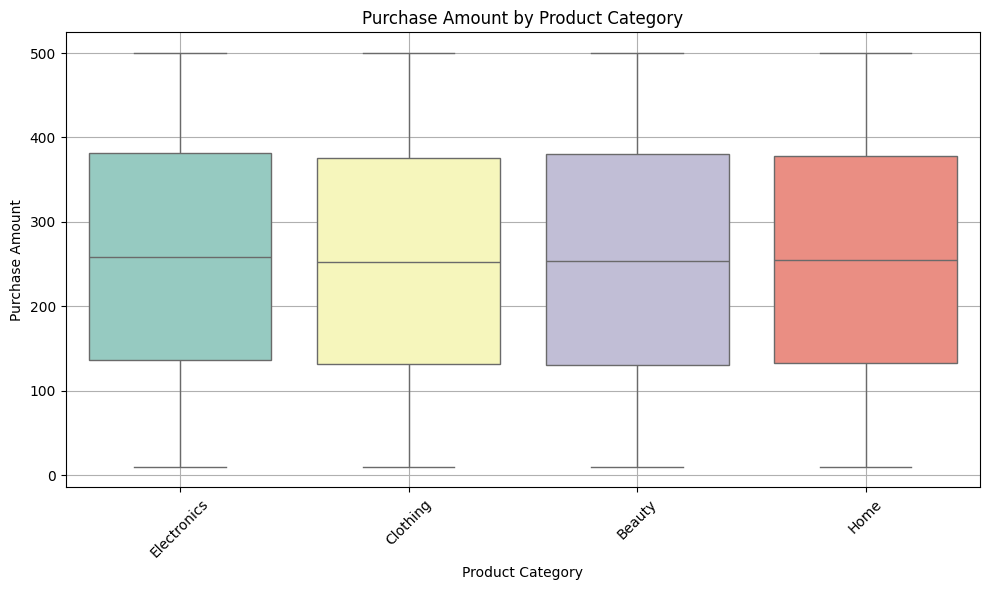

In [ ]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='Category', y='Purchase_Amount', data=df, palette='Set3')
plt.title('Purchase Amount by Product Category')
plt.xlabel('Product Category')
plt.ylabel('Purchase Amount')
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()

### ✅ Purpose
To examine how **purchase amount** varies across different **product categories**.

### 📊 Insights
- **Electronics** have the **highest variation** and some of the largest purchase amounts.
- **Home** and **Beauty** categories tend to have **lower median spending** compared to Electronics.
- **Clothing** purchases are typically on the **lower end** of the spending spectrum.

This implies that Electronics drive high-revenue transactions, while other categories have more modest average purchases.

In [ ]:
pd.crosstab(df['Discount_Applied'], df['Repeat_Customer'])

Repeat_Customer,No,Yes
Discount_Applied,,
No,12426,12592
Yes,12330,12652


## **-------Catherine----------**

In [ ]:
#import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.impute import SimpleImputer
from scipy import stats
import statsmodels.api as sm
from sklearn.model_selection import train_test_split

#load dataset
#df = pd.read_csv('/content/sample_data/Walmart_customer_purchases.csv')

from google.colab import files
uploaded = files.upload()

MessageError: RangeError: Maximum call stack size exceeded.

# **Multiple Linear Regression**
Objective: predict Purchase Amount based on the other numerical variables of Age and Rating using multiple linear regression.

## 1. Examine Scatter Plots

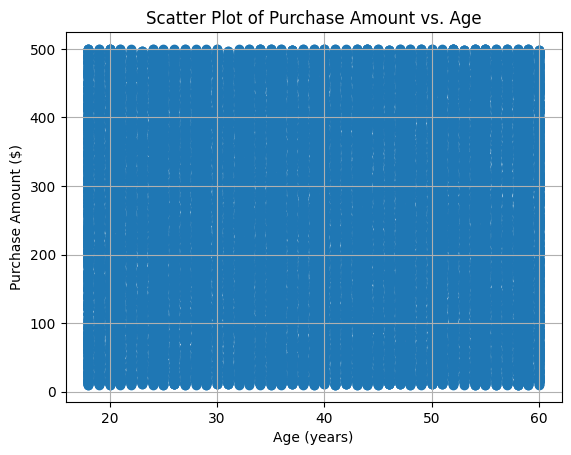

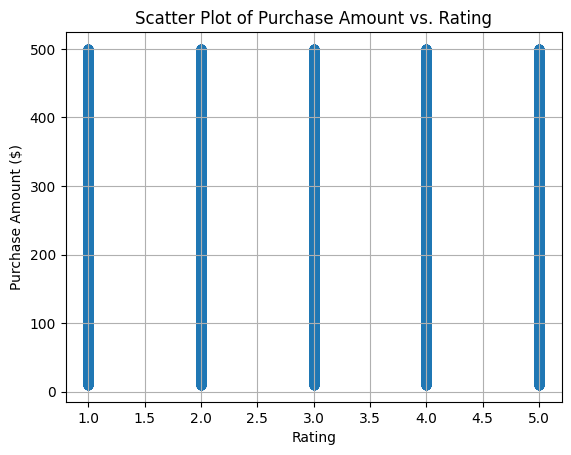

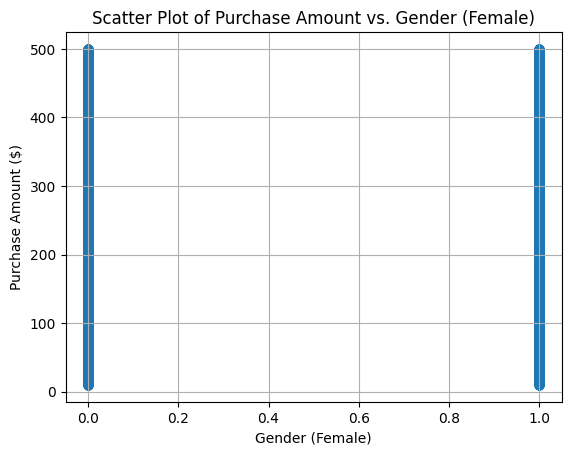

In [ ]:
#add gender as dummy variable
gender_female = df['Gender_Female'] = (df['Gender'] == 'Female').astype(int)
gender_other = df['Gender_Other'] = (df['Gender'] == 'Other').astype(int)

# numerical variable matrix + gender where female=1 and male,other=0
mlr = df[['Age','Purchase_Amount','Rating','Gender_Female']]

#define scatter plot variables
purchase_amount = mlr['Purchase_Amount']
age = df['Age']
rating = df['Rating']
gender_female = df['Gender_Female']

# Purchase Amount vs. Age scatter plot
plt.scatter(age, purchase_amount)
plt.xlabel('Age (years)')
plt.ylabel('Purchase Amount ($)')
plt.title('Scatter Plot of Purchase Amount vs. Age')
plt.grid(True)
plt.show()

# Purchase Amount vs. Rating scatter plot
plt.scatter(rating, purchase_amount)
plt.xlabel('Rating')
plt.ylabel('Purchase Amount ($)')
plt.title('Scatter Plot of Purchase Amount vs. Rating')
plt.grid(True)
plt.show()

# Purchase Amount vs. Gender (Female) scatter plot
plt.scatter(gender_female, purchase_amount)
plt.xlabel('Gender (Female)')
plt.ylabel('Purchase Amount ($)')
plt.title('Scatter Plot of Purchase Amount vs. Gender (Female)')
plt.grid(True)
plt.show()

## 2. Calculate Correlation Matrix
(and add Gender_Female as dummy variable)


In [ ]:
# from google.colab import drive
# drive.mount('/content/drive')

#load dataset
#df = pd.read_csv('/content/sample_data/Walmart_customer_purchases.csv')

#add gender as dummy variable
gender_female = df['Gender_Female'] = (df['Gender'] == 'Female').astype(int)
gender_other = df['Gender_Other'] = (df['Gender'] == 'Other').astype(int)

# numerical variable matrix + gender where female=1 and male,other=0
mlr = df[['Age','Purchase_Amount','Rating','Gender_Female']]

# Calculate the correlation matrix
mlr_corr_matrix = mlr.corr()

# Display the correlation matrix
print('Correlation Matrix:\n')
print(mlr_corr_matrix)
pd.set_option('display.max_colwidth', None)
mlr_corr_matrix
mlr_corr_matrix.to_excel('/content/drive/My Drive/UMBC Spring 25/DATA 608/Project/mlr_corr_matrix.xlsx', index=False)



Correlation Matrix:

                      Age  Purchase_Amount    Rating  Gender_Female
Age              1.000000        -0.001436 -0.008402       0.005945
Purchase_Amount -0.001436         1.000000 -0.006648       0.004234
Rating          -0.008402        -0.006648  1.000000       0.000956
Gender_Female    0.005945         0.004234  0.000956       1.000000


OSError: Cannot save file into a non-existent directory: '/content/drive/My Drive/UMBC Spring 25/DATA 608/Project'

In [ ]:
# Correlation Heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(mlr_corr_matrix, annot=True, cmap='GnBu', fmt=".4f", linewidths=0.5)
plt.title("Correlation Heatmap")
# plt.show()
plt.savefig('/content/drive/My Drive/UMBC Spring 25/DATA 608/Project/heatmap.png', transparent=True)

## 3. Perform t-test -- determine correlation > 0 at the 10% significance level
*   H0: rho_hat = 0
*   HA: rho_hat > 0



In [ ]:
# test that correlations are indeed >0
# H0: rho_hat = 0
# HA: rho_hat > 0

n = len(mlr.iloc[:,0])
rho_0 = 0
alpha = 0.10
columns = mlr.corr().columns.tolist()

rho_bar_long = mlr_corr_matrix.values.flatten().tolist()
rho_bar = []
for r in rho_bar_long:
  if r != 1 and r not in rho_bar:
    rho_bar.append(r)

t_test_results = []
for rho_hat in rho_bar:
  t_stat = ((1/2 * np.log((1+rho_hat)/(1-rho_hat)))-(1/2 * np.log((1+rho_0)/(1-rho_0))))/(1/np.sqrt(n-3))
  p_val = (1 - stats.t.cdf(np.abs(t_stat), df=n - 2)) # one-sided
  result = p_val < alpha
  t_test_results.append([float(round(rho_hat,6)),float(round(t_stat,4)),float(round(p_val,4)),bool(result)])

print('T-test Results - "True" indicates p-value < alpha:\n')
print('[Rho_hat,','t-stat,','p-val,','test result]')
for x in t_test_results:
  print(x)

# correlations > 0 for rho_hat[1], rho_hat[2], rho_hat[3]

T-test Results - "True" indicates p-value < alpha:

[Rho_hat, t-stat, p-val, test result]
[-0.001436, -0.321, 0.3741, False]
[-0.008402, -1.8788, 0.0301, True]
[0.005945, 1.3293, 0.0919, True]
[-0.006648, -1.4866, 0.0686, True]
[0.004234, 0.9468, 0.1719, False]
[0.000956, 0.2137, 0.4154, False]


## 4. Correlation T-Test Results
Based on the results of the t-test, we can reject the null hypothesis and conclude that there is some relationship of correlation > 0 between the following variables at the 10% significance level:

*   Age and Rating
*   Age and Gender
*   Rating and Purchase Amount

However, we should also note that these results are barely squeaking into the 10% significance level and FAIL at the 5% level.









## 5. Determine Overall Multiple Linear Regression Model -- All Numerical Variables + Gender
Independent Variables, X = Age, Rating, Gender
Dependent Variable, y = Purchase Amount

In [ ]:
# define independent and dependent variables
X = df[['Age','Rating', 'Gender_Female']]  # Adjust column name based on actual data
y = df['Purchase_Amount']

# Add a constant to the independent variables matrix (for the intercept)
X = sm.add_constant(X)

# Fit the OLS model
model = sm.OLS(y, X).fit()

# Print the summary of the model
print(model.summary())



                            OLS Regression Results                            
Dep. Variable:        Purchase_Amount   R-squared:                       0.000
Model:                            OLS   Adj. R-squared:                  0.000
Method:                 Least Squares   F-statistic:                     1.075
Date:                Tue, 20 May 2025   Prob (F-statistic):              0.358
Time:                        20:58:57   Log-Likelihood:            -3.1859e+05
No. Observations:               50000   AIC:                         6.372e+05
Df Residuals:                   49996   BIC:                         6.372e+05
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const           257.7781      2.526    102.039

### Regression Interpretation
As expected, due to low correlation levels and a mostly uniform distributions, the method of multiple linear regression does not work well to use Age, Rating, and Gender to predict Purchase Amount. In fact, the constant Beta0 is $257.78 +/- $4.16 at a 90 percent CI.

Furthermore, the sample mean from the data $255.53, illustrating that only about $2 --less than 1%--of the purchase amount could be predicted with the variables.

R^2 and Adjusted R^2 are both 0.0.

## Plotting Predictions with Overall Regression Model -- Purchase Amount vs. Numerical Variables

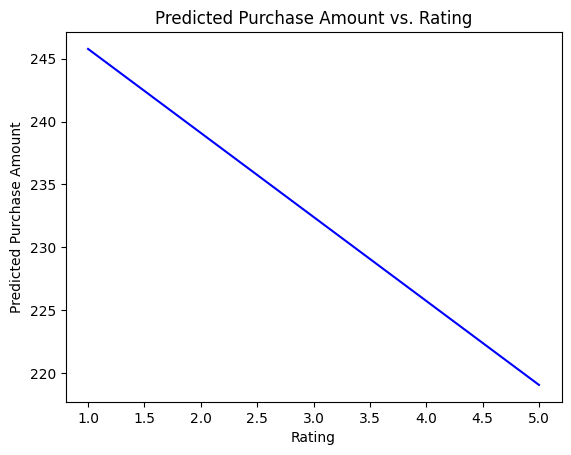

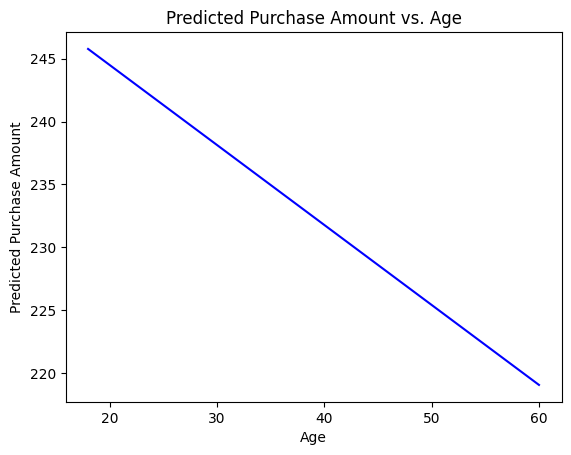

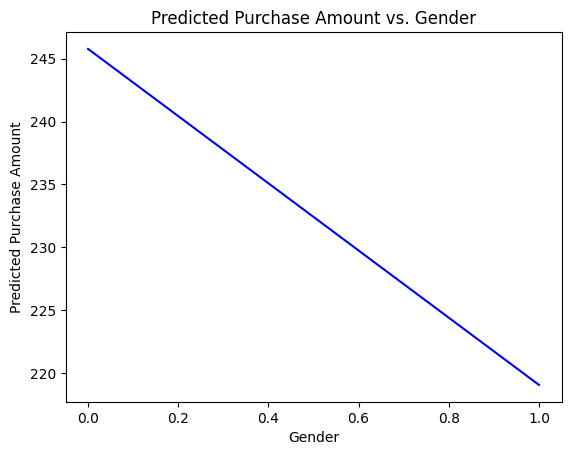

In [ ]:
rating_range = np.linspace(X['Rating'].min(), X['Rating'].max(), 100)
age_range = np.linspace(X['Age'].min(), X['Age'].max(), 100)
gender_range = np.linspace(X['Gender_Female'].min(), X['Gender_Female'].max(), 100)

y_new = pd.DataFrame({'const': 1, 'Rating': rating_range, 'Age': age_range, 'Gender_Female': gender_range})
y_pred = model.predict(y_new)
y_pred

plt.plot(rating_range, y_pred, color='blue')
plt.xlabel('Rating')
plt.ylabel('Predicted Purchase Amount')
plt.title('Predicted Purchase Amount vs. Rating')
plt.show()

plt.plot(age_range, y_pred, color='blue')
plt.xlabel('Age')
plt.ylabel('Predicted Purchase Amount')
plt.title('Predicted Purchase Amount vs. Age')
plt.show()

plt.plot(gender_range, y_pred, color='blue')
plt.xlabel('Gender')
plt.ylabel('Predicted Purchase Amount')
plt.title('Predicted Purchase Amount vs. Gender')
plt.show()

### Another Method -- Calculate Least Squares Manually

In [ ]:
# Define training/testing variables
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=17) # split 80/20 training/testing

# Define and calculate components for Beta matrix
Xt_train = X_train.T
Xt_trainX_train = X_train.T @ X_train
Xt_trainX_train_inv = np.linalg.inv(Xt_trainX_train)
Xt_trainy_train = X_train.T @ y_train

# Calculate and print Beta
Beta = Xt_trainX_train_inv @ Xt_trainy_train
print('Beta =',Beta,'\n')

# Calculate predicted y values on test data
y_pred = X_test @ Beta

# Define and calculate components for R^2 and RMSE calculations
y_bar = np.repeat(np.mean(y_train),len(y_pred)).reshape(-1,1) # y_bar average vector
N = len(y_test) # number of observations in test data


SSR = np.sum((y_pred - y_test)**2).item() # sum of squared residuals (test) (convert vector to float)
SST = np.sum((y_bar.ravel() - y_test)**2).item() # total sum of squares (test) (convert vector to float)

#Calculate and print RMSE and R^2
RMSE = np.sqrt(SSR / N)
R2 = 1 - SSR / SST
print('RMSE =',RMSE)
print('R^2 =',R2)

Beta = [ 2.59004363e+02 -4.89312856e-02 -1.01509133e+00  2.14320452e+00] 

RMSE = 141.76906906111435
R^2 = -0.0005034599636470904


Again, goodness of fit is quite bad with R^2 at 0 and Beta0 close to the mean of the test data set.  

---



### Plotting Predictions - Female and Male/Other as Separate Categories

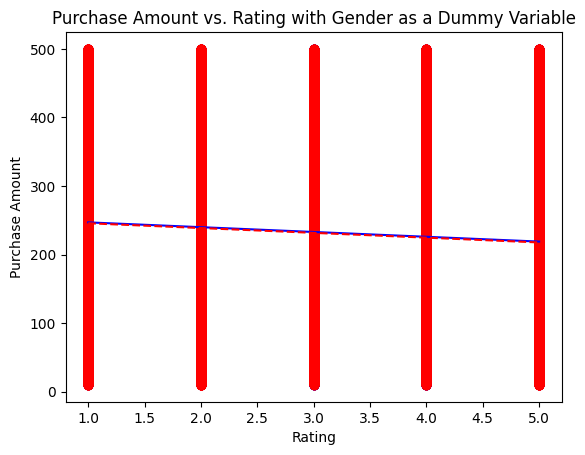

In [ ]:
rating_range = np.linspace(X['Rating'].min(), X['Rating'].max(), 100)
age_range = np.linspace(X['Age'].min(), X['Age'].max(), 100)
female_dummy = np.ones_like(rating_range)  # Female
male_dummy = np.zeros_like(rating_range)  # Male

# Predict for Female
new_X_female = pd.DataFrame({'const': 1, 'Rating': rating_range, 'Age': age_range, 'Gender_Female': female_dummy})
mean_pred_female = model.predict(new_X_female)

# Predict for Male (assuming Female is the dummy variable, so we don't include it for male)
new_X_male = pd.DataFrame({'const': 1, 'Rating': rating_range, 'Age': age_range, 'Gender_Female': male_dummy})
mean_pred_male = model.predict(new_X_male)

# Plotting the data points

plt.scatter(df['Rating'][df['Gender_Female'] == 1], df['Purchase_Amount'][df['Gender_Female'] == 1], label='Female', color='blue')
plt.scatter(df['Rating'][df['Gender_Female'] == 0], df['Purchase_Amount'][df['Gender_Female'] == 0], label='Male/Other', color='red')

# Plotting the fitted lines for both Male and Female
plt.plot(rating_range, mean_pred_female, label='Fitted line (Female)', color='blue')
plt.plot(rating_range, mean_pred_male, label='Fitted line (Male/Other)', color='red', linestyle='dashed')

plt.xlabel('Rating')
plt.ylabel('Purchase Amount')
plt.title('Purchase Amount vs. Rating with Gender as a Dummy Variable')

plt.show()


In [ ]:
X_new = mlr[['Age','Rating','Gender_Female','Purchase_Amount']]
X_female = X_new[X_new['Gender_Female'] == 1][['Age', 'Rating']]
y_female = X_new[X_new['Gender_Female'] == 1][['Purchase_Amount']]


X_female = sm.add_constant(X_female)


# Fit the OLS model
female_model = sm.OLS(y_female, X_female).fit()

# Print the summary of the model
print('Calculate Summary Statistics for Female Only\n')
print(female_model.summary())

Calculate Summary Statistics for Female Only

                            OLS Regression Results                            
Dep. Variable:        Purchase_Amount   R-squared:                       0.000
Model:                            OLS   Adj. R-squared:                 -0.000
Method:                 Least Squares   F-statistic:                    0.1227
Date:                Tue, 20 May 2025   Prob (F-statistic):              0.884
Time:                        20:59:22   Log-Likelihood:            -1.0586e+05
No. Observations:               16605   AIC:                         2.117e+05
Df Residuals:                   16602   BIC:                         2.117e+05
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const 

In [ ]:
X_new = mlr[['Age','Rating','Gender_Female','Purchase_Amount']]
X_male = X_new[X_new['Gender_Female'] == 0][['Age', 'Rating']]
y_male = X_new[X_new['Gender_Female'] == 0][['Purchase_Amount']]


X_male = sm.add_constant(X_male)


# Fit the OLS model
male_model = sm.OLS(y_male, X_male).fit()

# Print the summary of the model
print('Calculate Summary Statistics for Male/Other Only\n')
print(male_model.summary())

Calculate Summary Statistics for Male/Other Only

                            OLS Regression Results                            
Dep. Variable:        Purchase_Amount   R-squared:                       0.000
Model:                            OLS   Adj. R-squared:                  0.000
Method:                 Least Squares   F-statistic:                     1.154
Date:                Tue, 20 May 2025   Prob (F-statistic):              0.315
Time:                        20:59:24   Log-Likelihood:            -2.1273e+05
No. Observations:               33395   AIC:                         4.255e+05
Df Residuals:                   33392   BIC:                         4.255e+05
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
co

Again, goodness of fit is quite bad with R^2 at 0 and Beta0 close to the mean of the test data set.  

## Multicollinearity
The results of the t-test showed the strongest correlations at a 10% significance level to be between the pairs below, suggesting some level of collinearity. As such, we can examine simple linear regression with each variable individually.
*   Age and Rating
*   Age and Gender
*   Rating and Purchase Amount




## Simple Linear Regression -- Age vs. Purchase Amount

In [ ]:
# define independent and dependent variables
x_age = mlr['Age']  # Adjust column name based on actual data
y = mlr['Purchase_Amount']

# Add a constant to the independent variables matrix (for the intercept)
x_age = sm.add_constant(x_age)

# Fit the OLS model
model_age = sm.OLS(y, x_age).fit()

# Print the summary of the model
print(model_age.summary())

                            OLS Regression Results                            
Dep. Variable:        Purchase_Amount   R-squared:                       0.000
Model:                            OLS   Adj. R-squared:                 -0.000
Method:                 Least Squares   F-statistic:                    0.1030
Date:                Tue, 20 May 2025   Prob (F-statistic):              0.748
Time:                        20:59:27   Log-Likelihood:            -3.1859e+05
No. Observations:               50000   AIC:                         6.372e+05
Df Residuals:                   49998   BIC:                         6.372e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        256.1706      2.087    122.733      0.0

## Simple Linear Regression -- Rating vs. Purchase Amount

In [ ]:
# define independent and dependent variables
x_rating = mlr['Rating']  # Adjust column name based on actual data
y = mlr['Purchase_Amount']

# Add a constant to the independent variables matrix (for the intercept)
x_rating = sm.add_constant(x_rating)

# Fit the OLS model
model_rating = sm.OLS(y, x_rating).fit()

# Print the summary of the model
print(model_rating.summary())

                            OLS Regression Results                            
Dep. Variable:        Purchase_Amount   R-squared:                       0.000
Model:                            OLS   Adj. R-squared:                  0.000
Method:                 Least Squares   F-statistic:                     2.210
Date:                Tue, 20 May 2025   Prob (F-statistic):              0.137
Time:                        20:59:28   Log-Likelihood:            -3.1859e+05
No. Observations:               50000   AIC:                         6.372e+05
Df Residuals:                   49998   BIC:                         6.372e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        257.5227      1.481    173.873      0.0

## Simple Linear Regression -- Gender vs. Purchase Amount

In [ ]:
# define independent and dependent variables
x_gender = mlr['Gender_Female']  # Adjust column name based on actual data
y = mlr['Purchase_Amount']

# Add a constant to the independent variables matrix (for the intercept)
x_gender = sm.add_constant(x_gender)

# Fit the OLS model
model_gender = sm.OLS(y, x_gender).fit()

# Print the summary of the model
print(model_gender.summary())

                            OLS Regression Results                            
Dep. Variable:        Purchase_Amount   R-squared:                       0.000
Model:                            OLS   Adj. R-squared:                 -0.000
Method:                 Least Squares   F-statistic:                    0.8965
Date:                Tue, 20 May 2025   Prob (F-statistic):              0.344
Time:                        20:59:30   Log-Likelihood:            -3.1859e+05
No. Observations:               50000   AIC:                         6.372e+05
Df Residuals:                   49998   BIC:                         6.372e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const           255.1095      0.775    329.293

## Multiple Linear Regression -- Split Data Set by Category -- Beauty

In [ ]:
cat = df[['Age','Rating','Gender','Purchase_Amount','Category']]
X_beauty = cat[cat['Category'] == 'Beauty'][['Age', 'Rating']]
y_beauty = cat[cat['Category'] == 'Beauty'][['Purchase_Amount']]

X_beauty = sm.add_constant(X_beauty)

# Fit the OLS model
beauty_model = sm.OLS(y_beauty, X_beauty).fit()

# Print the summary of the model
print('Calculate Summary Statistics for Beauty Category\n')
print(beauty_model.summary())

Calculate Summary Statistics for Beauty Category

                            OLS Regression Results                            
Dep. Variable:        Purchase_Amount   R-squared:                       0.000
Model:                            OLS   Adj. R-squared:                  0.000
Method:                 Least Squares   F-statistic:                     2.451
Date:                Tue, 20 May 2025   Prob (F-statistic):             0.0863
Time:                        20:59:31   Log-Likelihood:                -79343.
No. Observations:               12447   AIC:                         1.587e+05
Df Residuals:                   12444   BIC:                         1.587e+05
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
co

## Multiple Linear Regression -- Split Data Set by Category -- Electronics

In [ ]:
cat = df[['Age','Rating','Gender','Purchase_Amount','Category']]
X_elec = cat[cat['Category'] == 'Electronics'][['Age', 'Rating']]
y_elec = cat[cat['Category'] == 'Electronics'][['Purchase_Amount']]

X_elec = sm.add_constant(X_elec)

# Fit the OLS model
elec_model = sm.OLS(y_elec, X_elec).fit()

# Print the summary of the model
print('Calculate Summary Statistics for Electronics Category\n')
print(elec_model.summary())

Calculate Summary Statistics for Electronics Category

                            OLS Regression Results                            
Dep. Variable:        Purchase_Amount   R-squared:                       0.000
Model:                            OLS   Adj. R-squared:                 -0.000
Method:                 Least Squares   F-statistic:                    0.1793
Date:                Tue, 20 May 2025   Prob (F-statistic):              0.836
Time:                        20:59:34   Log-Likelihood:                -80547.
No. Observations:               12642   AIC:                         1.611e+05
Df Residuals:                   12639   BIC:                         1.611e+05
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------

## Multiple Linear Regression -- Split Data Set by Category -- Clothing

In [ ]:
cat = df[['Age','Rating','Gender','Purchase_Amount','Category']]
X_cloth = cat[cat['Category'] == 'Clothing'][['Age', 'Rating']]
y_cloth= cat[cat['Category'] == 'Clothing'][['Purchase_Amount']]

X_cloth = sm.add_constant(X_cloth)

# Fit the OLS model
cloth_model = sm.OLS(y_cloth, X_cloth).fit()

# Print the summary of the model
print('Calculate Summary Statistics for Clothing Category\n')
print(cloth_model.summary())

Calculate Summary Statistics for Clothing Category

                            OLS Regression Results                            
Dep. Variable:        Purchase_Amount   R-squared:                       0.000
Model:                            OLS   Adj. R-squared:                  0.000
Method:                 Least Squares   F-statistic:                     1.305
Date:                Tue, 20 May 2025   Prob (F-statistic):              0.271
Time:                        20:59:38   Log-Likelihood:                -79054.
No. Observations:               12419   AIC:                         1.581e+05
Df Residuals:                   12416   BIC:                         1.581e+05
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------


## Multiple Linear Regression -- Split Data Set by Category -- Home

In [ ]:
cat = df[['Age','Rating','Gender','Purchase_Amount','Category']]
X_home = cat[cat['Category'] == 'Home'][['Age', 'Rating']]
y_home= cat[cat['Category'] == 'Home'][['Purchase_Amount']]

X_home = sm.add_constant(X_home)

# Fit the OLS model
home_model = sm.OLS(y_home, X_home).fit()

# Print the summary of the model
print('Calculate Summary Statistics for Home Category\n')
print(home_model.summary())

Calculate Summary Statistics for Home Category

                            OLS Regression Results                            
Dep. Variable:        Purchase_Amount   R-squared:                       0.000
Model:                            OLS   Adj. R-squared:                 -0.000
Method:                 Least Squares   F-statistic:                    0.3864
Date:                Tue, 20 May 2025   Prob (F-statistic):              0.680
Time:                        20:59:40   Log-Likelihood:                -79636.
No. Observations:               12492   AIC:                         1.593e+05
Df Residuals:                   12489   BIC:                         1.593e+05
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
cons

## Overall Regression Notes

Overall, we have seen that both simple and multiple linear regression do not adequately model purchase amount behavior with the data set. Regressing over all numerical variables resulted in R^2 and adjusted R^2 calculated at zero. Surprisingly, the results also varied very little when splitting the data by gender or category. In all cases, less than 1% of the variation in price was explained by independent variables with Beta0 close to the sample mean. This indicates that with this particular data set, the mean is a better predictor of purchase amount than any other numerical variables.

These results are unsurprising due to the uniformity of the data set.

## Regression Methods Summary Table -- For Presentation

In [ ]:
group_dict = {
    'All': df,
    'Female': df[df['Gender_Female'] == 1],
    'Non-Female': df[df['Gender_Female'] == 0],
    'Home': df[df['Category'] == 'Home'],
    'Electronics': df[df['Category'] == 'Electronics'],
    'Clothing': df[df['Category'] == 'Clothing'],
    'Beauty': df[df['Category'] == 'Beauty']}

round_digits_mean = 2
round_digits_stats = 4

def regression_summary_by_group(
    df,
    target_col,
    predictor_cols,
    group_dict):

    results = []

    for group_name, subset in group_dict.items():
        y = subset[target_col]
        X = subset[predictor_cols]
        X = sm.add_constant(X)

        model = sm.OLS(y, X).fit()

        # result row beginning
        row = {
            'Subgroup': group_name,
            'Sample Size': len(subset),
            'Sample Mean': f'{y.mean():.{round_digits_mean}f}',
            'Sample Std Dev': f'{y.std():.{round_digits_mean}f}',
            'Predicted Mean': f'{model.predict().mean():.{round_digits_mean}f}',
            'R^2': f'{model.rsquared:.{round_digits_stats}f}',
            'Adj R^2': f'{model.rsquared_adj:.{round_digits_stats}f}',
            '% Explained': f'{model.rsquared * 100:.4f}%'}

        # + Beta coefficients
        for var in ['const'] + predictor_cols:
            row[f'Beta_{var}'] = f'{model.params.get(var, np.nan):.{round_digits_stats}f}'

        results.append(row)

    summary_df = pd.DataFrame(results)
    return summary_df

summary = regression_summary_by_group(
    df=mlr,
    target_col='Purchase_Amount',
    predictor_cols=['Age','Rating','Gender_Female'],
    group_dict=group_dict)
# print(summary)

ordered_cols =  ['Subgroup'] + \
                [col for col in summary.columns if col.startswith('Beta')] + \
                ['Sample Size', 'Sample Mean', 'Sample Std Dev', 'R^2', 'Adj R^2', '% Explained']


summary_ppt = summary[ordered_cols]
# print(summary_ppt)

pd.set_option('display.max_colwidth', None)

summary_ppt

,Subgroup,Beta_const,Beta_Age,Beta_Rating,Beta_Gender_Female,Sample Size,Sample Mean,Sample Std Dev,R^2,Adj R^2,% Explained
0,All,257.7781,-0.0173,-0.6655,1.2775,50000,255.53,141.57,0.0001,0.0000,0.0064%
1,Female,nan,-0.0053,-0.3843,257.7430,16605,256.38,142.03,0.0000,-0.0001,0.0015%
2,Non-Female,258.4233,-0.0233,-0.8034,0.0000,33395,255.11,141.35,0.0001,0.0000,0.0069%
3,Home,259.6362,-0.0475,-0.6722,0.0346,12492,255.78,142.03,0.0001,-0.0002,0.0062%
4,Electronics,260.3558,-0.0223,-0.4926,-0.2481,12642,257.93,141.52,0.0000,-0.0002,0.0029%
5,Clothing,259.3697,-0.1652,-0.1556,2.4981,12419,253.32,140.72,0.0003,0.0000,0.0280%
6,Beauty,251.8779,0.1624,-1.3825,2.9875,12447,255.06,141.99,0.0005,0.0003,0.0493%


In [ ]:
# from google.colab import drive
# drive.mount('/content/drive')
summary_ppt.to_excel('/content/drive/My Drive/UMBC Spring 25/DATA 608/Project/regression_summary_table.xlsx', index=False)

#One-Way ANOVA--Shaheen

###Objective: To determine if there is a statistically significant difference in mean Purchase Amounts across different Payment Methods.

 Assumptions of One-Way ANOVA:

Independence: Observations must be independent of each other.

Normality: The distribution of the response variable (Purchase_Amount) should be approximately normal for each group (Payment_Method).

Homogeneity of Variances: The variance of Purchase_Amount should be equal across all Payment_Method groups.

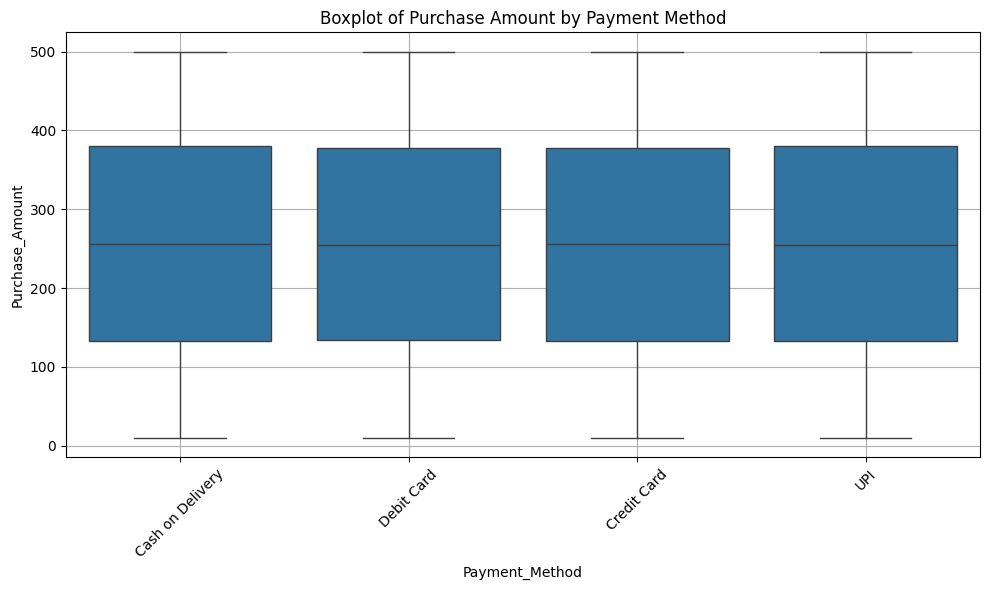

Shapiro-Wilk Test (Normality by Group):
Cash on Delivery: W = 0.9530, p = 0.0000
Debit Card: W = 0.9506, p = 0.0000
Credit Card: W = 0.9530, p = 0.0000
UPI: W = 0.9453, p = 0.0000

Levene’s Test for Equal Variances:
Statistic = 0.6335, p = 0.5933
===== ANOVA Step-by-Step Results =====
Overall Mean: 255.53

Group Means:
Payment_Method
Cash on Delivery    255.744024
Credit Card         255.243348
Debit Card          254.935429
UPI                 256.217275
Name: Purchase_Amount, dtype: float64

--- Sum of Squares ---
Between-Group Sum of Squares (SSB): 11902.92
Within-Group Sum of Squares (SSW): 1002133814.64

--- Degrees of Freedom ---
df Between Groups: 3
df Within Groups: 49996

--- Mean Squares ---
MSB (Between Groups): 3967.64
MSW (Within Groups): 20044.28

--- ANOVA Result ---
F-statistic: 0.1979
p-value: 0.8978


<ipython-input-30-2121406a0bcc>:91: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=anova_df, x='Payment_Method', y='Purchase_Amount', palette='Set2')


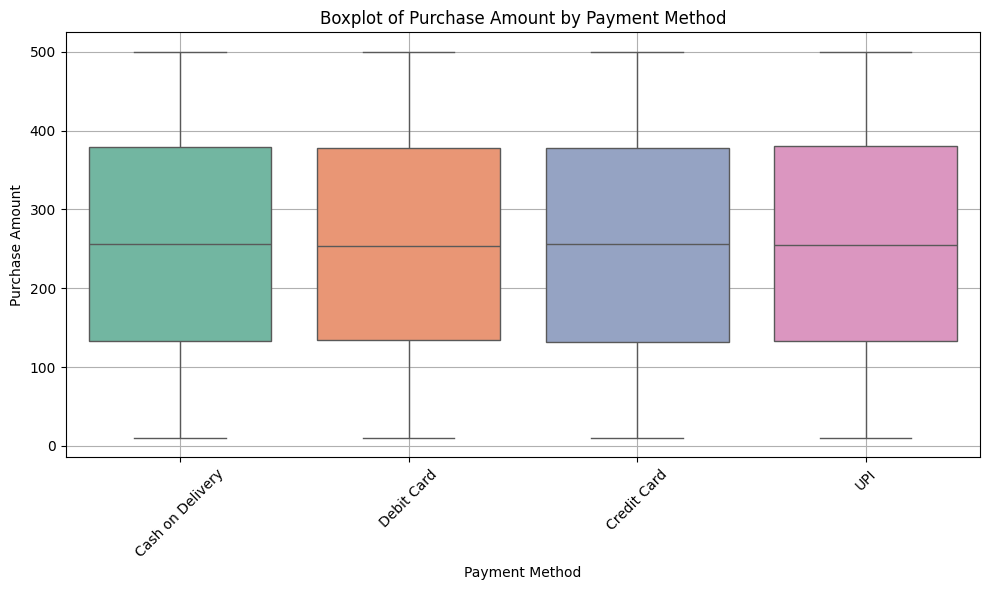

Conclusion: No significant difference in purchase amounts across payment methods.


In [ ]:
import pandas as pd
import scipy.stats as stats
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
df = pd.read_csv("Walmart_customer_purchases.csv")  # Adjust path as needed

# Select relevant columns and drop missing values
anova_df = df[['Purchase_Amount', 'Payment_Method']].dropna()

# Group the data by Payment Method
methods = anova_df['Payment_Method'].unique()
grouped_data = [
    anova_df['Purchase_Amount'][anova_df['Payment_Method'] == method]
    for method in methods
]

# Assumption 1: Visual Normality Check using Boxplot
plt.figure(figsize=(10, 6))
sns.boxplot(data=anova_df, x='Payment_Method', y='Purchase_Amount')
plt.title('Boxplot of Purchase Amount by Payment Method')
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()

# Assumption 2: Shapiro-Wilk Test for Normality
print("Shapiro-Wilk Test (Normality by Group):")
for i, group in enumerate(grouped_data):
    stat, p = stats.shapiro(group.sample(n=min(len(group), 500)))  # limit to 500 if too large
    print(f"{methods[i]}: W = {stat:.4f}, p = {p:.4f}")

# Assumption 3: Levene's Test for Equal Variance
levene_stat, levene_p = stats.levene(*grouped_data)
print("\nLevene’s Test for Equal Variances:")
print(f"Statistic = {levene_stat:.4f}, p = {levene_p:.4f}")

# One-Way ANOVA
# Step 1: Select and clean data
anova_df = df[['Purchase_Amount', 'Payment_Method']].dropna()

# Step 2: Group by Payment Method
groups = anova_df.groupby('Payment_Method')['Purchase_Amount']
group_means = groups.mean()
overall_mean = anova_df['Purchase_Amount'].mean()

# Step 3: Between-group Sum of Squares (SSB)
ssb = sum(groups.size() * (group_means - overall_mean) ** 2)

# Step 4: Within-group Sum of Squares (SSW)
ssw = 0
for method, mean in group_means.items():
    values = anova_df['Purchase_Amount'][anova_df['Payment_Method'] == method]
    ssw += ((values - mean) ** 2).sum()

# Step 5: Degrees of Freedom
k = len(group_means)
n = len(anova_df)
df_between = k - 1
df_within = n - k

# Step 6: Mean Squares
msb = ssb / df_between
msw = ssw / df_within

# Step 7: F-statistic and p-value
f_statistic = msb / msw
p_value = 1 - stats.f.cdf(f_statistic, df_between, df_within)

# Step 8: Print Results
print("===== ANOVA Step-by-Step Results =====")
print(f"Overall Mean: {overall_mean:.2f}\n")
print("Group Means:")
print(group_means)
print("\n--- Sum of Squares ---")
print(f"Between-Group Sum of Squares (SSB): {ssb:.2f}")
print(f"Within-Group Sum of Squares (SSW): {ssw:.2f}")
print("\n--- Degrees of Freedom ---")
print(f"df Between Groups: {df_between}")
print(f"df Within Groups: {df_within}")
print("\n--- Mean Squares ---")
print(f"MSB (Between Groups): {msb:.2f}")
print(f"MSW (Within Groups): {msw:.2f}")
print("\n--- ANOVA Result ---")
print(f"F-statistic: {f_statistic:.4f}")
print(f"p-value: {p_value:.4f}")

# Step 9: Boxplot Visualization
plt.figure(figsize=(10, 6))
sns.boxplot(data=anova_df, x='Payment_Method', y='Purchase_Amount', palette='Set2')
plt.title('Boxplot of Purchase Amount by Payment Method')
plt.xlabel('Payment Method')
plt.ylabel('Purchase Amount')
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()

# Final Interpretation
if p_value < 0.05:
    print("Conclusion: Significant difference in purchase amounts across payment methods.")
else:
    print("Conclusion: No significant difference in purchase amounts across payment methods.")


### save transparent background for presentation

FileNotFoundError: [Errno 2] No such file or directory: '/content/drive/My Drive/UMBC Spring 25/DATA 608/Project/box_plt.png'

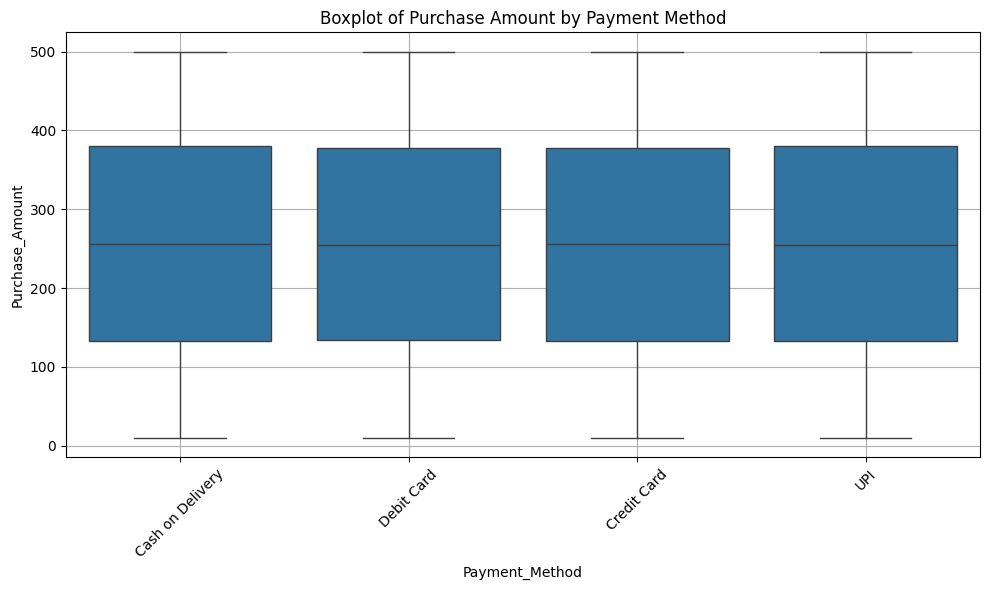

In [ ]:
# save transparent background for presentation

plt.figure(figsize=(10, 6))
sns.boxplot(data=anova_df, x='Payment_Method', y='Purchase_Amount')
plt.title('Boxplot of Purchase Amount by Payment Method')
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.savefig('/content/drive/My Drive/UMBC Spring 25/DATA 608/Project/box_plt.png', transparent=True)

#Conclusion:
Since p-value > 0.05, we fail to reject the null hypothesis.

➤ Interpretation: There is no statistically significant difference in average purchase amount across payment methods.

➤ Business Insight: Customers spend similarly, regardless of how they pay.



Evaluation Metrics:
MAE: 122.17
RMSE: 141.10
R-squared: -0.0001


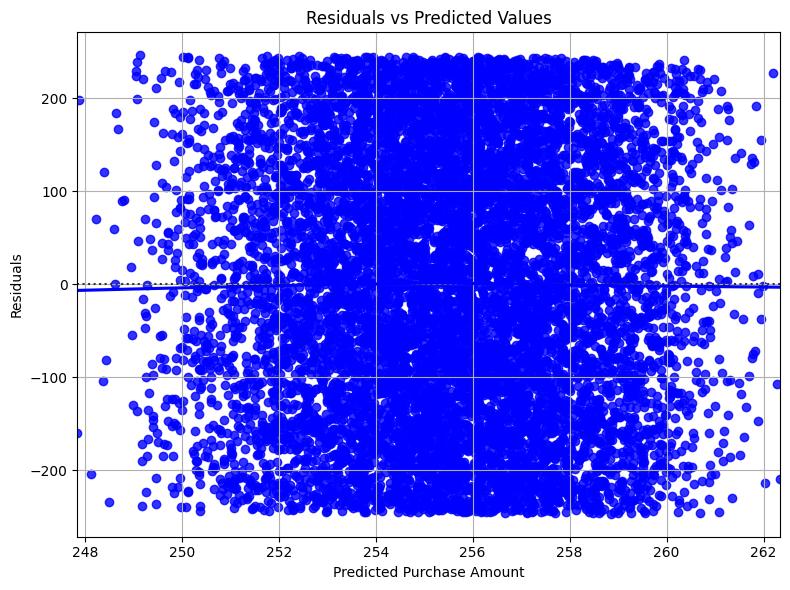

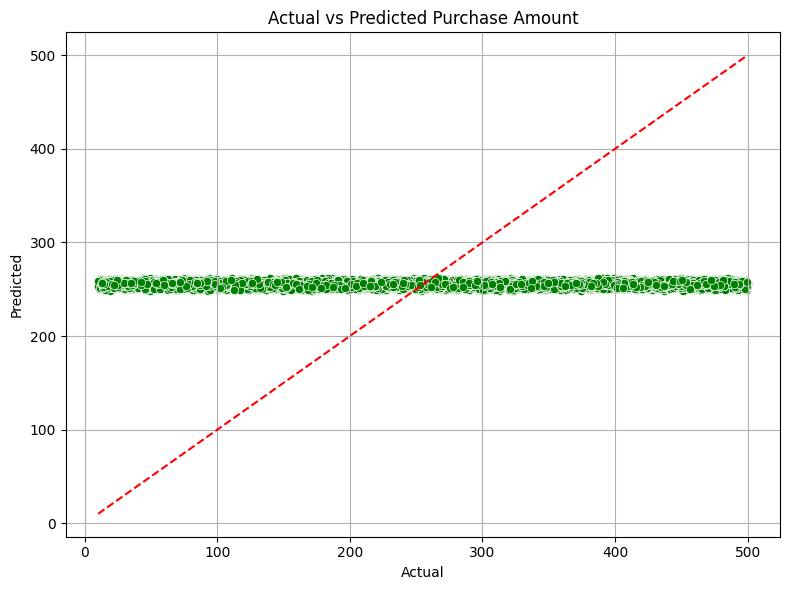


Confusion Matrix (Binned Purchase Amount):
               Predicted Low  Predicted Medium  Predicted High
Actual Low                 0              2817               0
Actual Medium              0              3090               0
Actual High                0              4093               0


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score, confusion_matrix

# Step 1: Load and clean data
df = pd.read_csv("Walmart_customer_purchases.csv")  # Use your actual path if needed

# Drop columns not needed for modeling
df_cleaned = df.drop(columns=["Customer_ID", "Purchase_Date", "Product_Name", "City"])

# Clean binary/categorical features
df_cleaned['Gender'] = df_cleaned['Gender'].replace({'Other': 'Non-Female'})
df_cleaned['Repeat_Customer'] = df_cleaned['Repeat_Customer'].map({'Yes': 1, 'No': 0})
df_cleaned['Discount_Applied'] = df_cleaned['Discount_Applied'].map({'Yes': 1, 'No': 0})

# Step 2: Define features and target
target = 'Purchase_Amount'
features = df_cleaned.columns.drop(target)

X = df_cleaned[features]
y = df_cleaned[target]

# Define feature types
categorical_features = ['Gender', 'Category', 'Payment_Method']
numeric_features = ['Age', 'Rating']
binary_features = ['Discount_Applied', 'Repeat_Customer']

# Step 3: Preprocessing and model pipeline
preprocessor = ColumnTransformer([
    ('num', StandardScaler(), numeric_features),
    ('cat', OneHotEncoder(drop='first'), categorical_features),
    ('bin', 'passthrough', binary_features)
])

model = Pipeline([
    ('preprocessor', preprocessor),
    ('regressor', LinearRegression())
])

# Step 4: Train/test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 5: Fit model and predict
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

# Step 6: Evaluation
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Evaluation Metrics:")
print(f"MAE: {mae:.2f}")
print(f"RMSE: {rmse:.2f}")
print(f"R-squared: {r2:.4f}")

# Step 7: Residual Plot
plt.figure(figsize=(8, 6))
sns.residplot(x=y_pred, y=y_test - y_pred, lowess=True, color='blue')
plt.title("Residuals vs Predicted Values")
plt.xlabel("Predicted Purchase Amount")
plt.ylabel("Residuals")
plt.grid(True)
plt.tight_layout()
plt.show()

# Step 8: Actual vs Predicted Plot
plt.figure(figsize=(8, 6))
sns.scatterplot(x=y_test, y=y_pred, color='green')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', linestyle='--')
plt.title("Actual vs Predicted Purchase Amount")
plt.xlabel("Actual")
plt.ylabel("Predicted")
plt.grid(True)
plt.tight_layout()
plt.show()

# Step 9: Confusion Matrix based on bins
bins = [0, 150, 300, 500]
labels = ["Low", "Medium", "High"]

y_test_binned = pd.cut(y_test, bins=bins, labels=labels)
y_pred_binned = pd.cut(y_pred, bins=bins, labels=labels)

conf_matrix = confusion_matrix(y_test_binned, y_pred_binned, labels=labels)
conf_matrix_df = pd.DataFrame(conf_matrix, index=[f"Actual {l}" for l in labels],
                              columns=[f"Predicted {l}" for l in labels])

print("\nConfusion Matrix (Binned Purchase Amount):")
print(conf_matrix_df)

# Customer Segementation - K Means Clustering

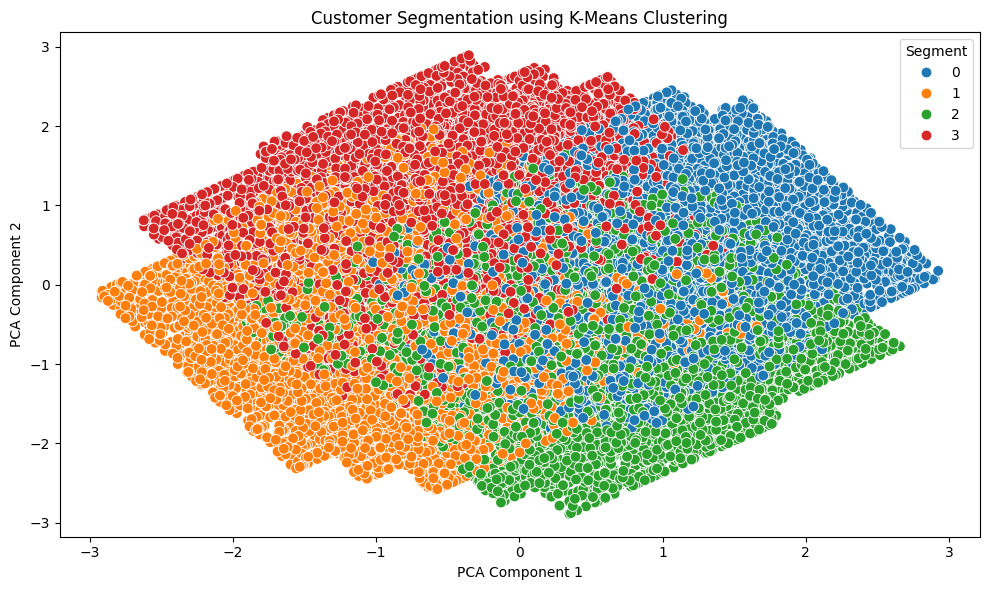


📋 Segment Profiles:
                    Age  Rating  Purchase_Amount  Repeat_Customer  \
Customer_Segment                                                    
0                 36.71    4.21           253.60             0.49   
1                 36.92    1.79           260.78             0.52   
2                 40.97    4.21           250.35             0.49   
3                 41.18    1.80           257.37             0.52   

                  Discount_Applied  
Customer_Segment                    
0                              0.0  
1                              1.0  
2                              1.0  
3                              0.0  


In [ ]:
# 📦 Step 1: Import Libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA

# 📥 Step 2: Load Data
df = pd.read_csv("Walmart_customer_purchases.csv")  # Replace with your actual path or mount from Drive

# 🧹 Step 3: Preprocess Data
df['Gender'] = df['Gender'].replace({'Other': 'Non-Female'})
df['Repeat_Customer'] = df['Repeat_Customer'].map({'Yes': 1, 'No': 0})
df['Discount_Applied'] = df['Discount_Applied'].map({'Yes': 1, 'No': 0})

# 🧼 Step 4: Handle Missing Values (Imputation)
df['Age'] = df['Age'].fillna(df['Age'].mean())
df['Rating'] = df['Rating'].fillna(df['Rating'].mean())
df['Purchase_Amount'] = df['Purchase_Amount'].fillna(df['Purchase_Amount'].mean())

# 🧮 Step 5: Select Features for Segmentation
segment_features = ['Age', 'Rating', 'Purchase_Amount', 'Repeat_Customer', 'Discount_Applied']
X = df[segment_features]

# ⚖️ Step 6: Standardize Features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# 🔢 Step 7: K-Means Clustering
kmeans = KMeans(n_clusters=4, random_state=42)
df['Customer_Segment'] = kmeans.fit_predict(X_scaled)

# 📉 Step 8: PCA for 2D Visualization
pca = PCA(n_components=2)
pca_components = pca.fit_transform(X_scaled)
df['PCA1'] = pca_components[:, 0]
df['PCA2'] = pca_components[:, 1]

# 🎨 Step 9: Visualize Segments
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='PCA1', y='PCA2', hue='Customer_Segment', palette='tab10', s=60)
plt.title("Customer Segmentation using K-Means Clustering")
plt.xlabel("PCA Component 1")
plt.ylabel("PCA Component 2")
plt.legend(title="Segment")
plt.tight_layout()
plt.show()

# 📊 Step 10: Profile Segments
segment_summary = df.groupby('Customer_Segment')[segment_features].mean().round(2)
print("\n📋 Segment Profiles:")
print(segment_summary)